### sentiment analysis
### document classification 

In [1]:
# Text Classifiation using NLP

# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
%cd "C:\training\Day9"

C:\training\Day9


In [3]:
# Importing the dataset
reviews = load_files('txt_sentoken/',shuffle=False)
X,y = reviews.data,reviews.target

In [17]:
X[0]

b'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience memb

In [15]:
# Pickling the dataset
with open('Review.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('sent.pickle','wb') as f:
    pickle.dump(y,f)



In [16]:
# Unpickling dataset
X_in = open('Review.pickle','rb')
y_in = open('sent.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [18]:

# Creating the corpus
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)    

In [19]:
corpus[0]

'plot two teen couples go to church party drink and then drive nthey get into an accident none of the guys dies but his girlfriend continues to see him in her life and has nightmares nwhat the deal nwatch the movie and sorta find out ncritique mind fuck movie for the teen generation that touches on very cool idea but presents it in very bad package nwhich is what makes this review an even harder one to write since generally applaud films which attempt to break the mold mess with your head and such lost highway memento but there are good and bad ways of making all types of films and these folks just didn snag this one correctly nthey seem to have taken this pretty neat concept but executed it terribly nso what are the problems with the movie nwell its main problem is that it simply too jumbled nit starts off normal but then downshifts into this fantasy world in which you as an audience member have no idea what going on nthere are dreams there are characters coming back from the dead the

In [20]:
# Creating the BOW model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [21]:
X

array([[ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       ...,
       [ 0,  1,  0, ...,  2,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [22]:
# Creating the Tf-Idf Model
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()



In [23]:
X

array([[0.        , 0.51680048, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04721612, 0.        ,
        0.        ],
       ...,
       [0.        , 0.03131821, 0.        , ..., 0.04410313, 0.        ,
        0.        ],
       [0.        , 0.04810554, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
TfidfVectorizer?

In [29]:

# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [30]:
X

array([[0.        , 0.51680048, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04721612, 0.        ,
        0.        ],
       ...,
       [0.        , 0.03131821, 0.        , ..., 0.04410313, 0.        ,
        0.        ],
       [0.        , 0.04810554, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(text_train,sent_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)
gscv_ada.fit(text_train, sent_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 20.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [33]:
# Testing model performance
sent_pred = classifier.predict(text_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sent_test, sent_pred)

In [34]:
cm

array([[170,  30],
       [ 22, 178]], dtype=int64)

In [38]:
import sklearn

In [41]:
sklearn.metrics.accuracy_score(sent_test,sent_pred)

0.87

In [20]:
# Saving our classifier
with open('classifier.pickle','wb') as f:
    pickle.dump(classifier,f)
    
# Saving the Tf-Idf model
with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)

### USING THE MODELS

In [52]:
# Using our classifier
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)
    
with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)
    
    
sample = ["You are a bad person man, have a bad life"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)

In [53]:
sentiment

array([0])

### Twitter data scoring

In [27]:
import sys
!{sys.executable} -m conda install tweepy

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - tweepy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [23]:
import tweepy
import re
import pickle

from tweepy import OAuthHandler

#Please change with your own consumer key, consumer secret, access token and access secret
# Initializing the keys
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'

ModuleNotFoundError: No module named 'tweepy'

In [24]:
# Initializing the tokens
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['facebook'];
api = tweepy.API(auth,timeout=10)


In [25]:
# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)


In [26]:
# Loading the vectorizer and classfier
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)    


In [31]:
total_pos = 0
total_neg = 0

In [32]:
# Preprocessing the tweets
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    print(tweet,":",sent)
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1


(u'donald trump assumed office on th january half of the tenure completed he has been to china japan sout ', ':', array([0]))
(u'dow to pop higher after trump backs away from declaring emergency to build border wall ', ':', array([1]))
(u'european union countries are expected to next week approve scheme to limit imports of steel into the bloc followi ', ':', array([0]))
(u'trump still considering emergency declaration for border wall spokeswoman ', ':', array([1]))
(u'donald trump is real racist white supremacist says hollywood icon robert deniro ', ':', array([1]))
(u' kaitlancollins last night address seems to hv been grudging acquiescence on trump part heeding the advice ', ':', array([0]))
(u'are you looking for wordpress website design customization fix issues error html css problem theme cust ', ':', array([1]))
(u' shimonpro dude you almost went into how they disenfranchised likely hrc voters in swing states mi where trump ', ':', array([1]))
(u'trump pleads on tv for wall money

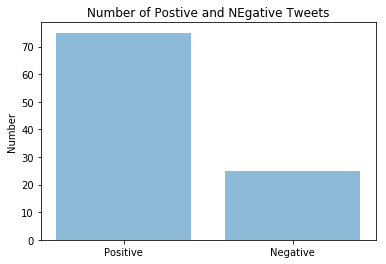

In [33]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()
